In [ ]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

Sales Data

In [14]:
# Define the trend of milk sales throughout the day
sales_trend = {
    "morning": {"peak": 0.8, "dip": 0.2},
    "mid_morning": {"peak": 0.4, "dip": 0.4},
    "lunchtime": {"peak": 0.2, "dip": 0.6},
    "afternoon": {"peak": 0.3, "dip": 0.5},
    "late_evening": {"peak": 0.6, "dip": 0.2},
    "night": {"peak": 0.2, "dip": 0.5}
}

# Define the seasonal trends
seasonal_trend = {
    "Summer": {"morning": 0.4, "mid_morning": 0.3, "lunchtime": 0.3, "afternoon": 0.2, "late_evening": 0.4, "night": 0.2},
    "Spring": {"morning": 0.2, "mid_morning": 0.2, "lunchtime": 0.2, "afternoon": 0.1, "late_evening": 0.2, "night": 0.2},
    "Fall": {"morning": 0.3, "mid_morning": 0.4, "lunchtime": 0.4, "afternoon": 0.3, "late_evening": 0.3, "night": 0.2},
    "Winter": {"morning": 0.6, "mid_morning": 0.5, "lunchtime": 0.5, "afternoon": 0.4, "late_evening": 0.6, "night": 0.3}
}



In [15]:
# Define price range of milk per liter (in rupees)
min_price ,max_price = 45,60
# max_price = 60

# Initialize an empty list to store the generated data
data = []

# Generate random milk sales data for 1000 days
for day in range(1, 1001):
    for season in ["Winter", "Spring", "Summer", "Fall"]:
        # Determine the price of milk based on seasonal demand
        if season in ["Summer", "Winter"]:
            price = random.randint(min_price, max_price - 5)  # Lower price during peak demand seasons
        else:
            price = random.randint(min_price + 5, max_price)  # Higher price during off-peak seasons
        
        for time_period, probabilities in sales_trend.items():
            # Determine the peak or dip for this time period based on the season
            is_peak = random.random() < (probabilities["peak"] * seasonal_trend[season][time_period])
            is_dip = random.random() < (probabilities["dip"] * seasonal_trend[season][time_period])
            
            # Generate sales based on the peak or dip probabilities
            if is_peak and not is_dip:
                # Peak sales
                units_sold = random.randint(80, 100)  # Adjust the range of sales as needed
            elif not is_peak and is_dip:
                # Dip sales
                units_sold = random.randint(0, 20)  # Adjust the range of sales as needed
            else:
                # Normal sales
                units_sold = random.randint(30, 50)  # Adjust the range of sales as needed
            
            # Append the sales data to the list
            data.append({"Day": f"Day {day}", "Time Period": time_period, "Units Sold": units_sold, "Season": season, "Price per Liter": price})

# Create a DataFrame from the generated data
sales_df = pd.DataFrame(data)

# Display the generated DataFrame
print(sales_df)


            Day   Time Period  Units Sold  Season  Price per Liter
0         Day 1       morning          33  Winter               54
1         Day 1   mid_morning          83  Winter               54
2         Day 1     lunchtime          46  Winter               54
3         Day 1     afternoon          45  Winter               54
4         Day 1  late_evening          36  Winter               54
...         ...           ...         ...     ...              ...
23995  Day 1000   mid_morning          33    Fall               58
23996  Day 1000     lunchtime          34    Fall               58
23997  Day 1000     afternoon          40    Fall               58
23998  Day 1000  late_evening          46    Fall               58
23999  Day 1000         night          50    Fall               58

[24000 rows x 5 columns]


Data Preprocessing

In [4]:
df = sales_df.copy()

# Create a datetime index starting from January 1st, 2019 with appropriate length
date_index = pd.date_range(start='2019-01-01', periods=len(df), freq='D')

# Set the index of the dataframe to the new date index
df = df.set_index(date_index)

# Optionally, rename the index if needed
df.index.names = ['Date']  # or any other preferred name

df.drop('Day', axis=1, inplace=True)
print(df)

             Time Period  Units Sold  Season  Price per Liter
Date                                                         
2019-01-01       morning          87  Winter               45
2019-01-02   mid_morning          95  Winter               45
2019-01-03     lunchtime          86  Winter               45
2019-01-04     afternoon          40  Winter               45
2019-01-05  late_evening          37  Winter               45
...                  ...         ...     ...              ...
2084-09-11   mid_morning          40    Fall               58
2084-09-12     lunchtime          33    Fall               58
2084-09-13     afternoon          31    Fall               58
2084-09-14  late_evening          95    Fall               58
2084-09-15         night          32    Fall               58

[24000 rows x 4 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24000 entries, 2019-01-01 to 2084-09-15
Freq: D
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time Period      24000 non-null  object
 1   Units Sold       24000 non-null  int64 
 2   Season           24000 non-null  object
 3   Price per Liter  24000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 937.5+ KB


In [6]:
tdf = pd.DataFrame(df.groupby(df.index).sum()['Units Sold'])
tdf.columns=['Value']

In [7]:
tdf

,Value
Date,
2019-01-01,87
2019-01-02,95
2019-01-03,86
2019-01-04,40
2019-01-05,37
...,...
2084-09-11,40
2084-09-12,33
2084-09-13,31


In [8]:
newdf=pd.DataFrame()
newdf['y']=tdf['Value']
newdf['ds']= pd.to_datetime(tdf.index)
newdf

,y,ds
Date,,
2019-01-01,87,2019-01-01
2019-01-02,95,2019-01-02
2019-01-03,86,2019-01-03
2019-01-04,40,2019-01-04
2019-01-05,37,2019-01-05
...,...,...
2084-09-11,40,2084-09-11
2084-09-12,33,2084-09-12
2084-09-13,31,2084-09-13


Data Modeling

In [9]:
from prophet import Prophet
model = Prophet()

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
model.fit(newdf)

00:59:35 - cmdstanpy - INFO - Chain [1] start processing
00:59:39 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,43.755200,15.405039,70.051908,43.755200,43.755200,-0.246014,-0.246014,-0.246014,0.144348,0.144348,0.144348,-0.390362,-0.390362,-0.390362,0.0,0.0,0.0,43.509186
1,2019-01-02,43.755131,16.840889,70.683868,43.755131,43.755131,-0.687829,-0.687829,-0.687829,-0.313310,-0.313310,-0.313310,-0.374519,-0.374519,-0.374519,0.0,0.0,0.0,43.067302
2,2019-01-03,43.755062,16.107128,70.679957,43.755062,43.755062,-0.341935,-0.341935,-0.341935,-0.001538,-0.001538,-0.001538,-0.340397,-0.340397,-0.340397,0.0,0.0,0.0,43.413127
3,2019-01-04,43.754993,15.014217,70.517367,43.754993,43.754993,-1.103590,-1.103590,-1.103590,-0.815312,-0.815312,-0.815312,-0.288278,-0.288278,-0.288278,0.0,0.0,0.0,42.651403
4,2019-01-05,43.754924,16.482006,73.948291,43.754924,43.754924,0.455133,0.455133,0.455133,0.674065,0.674065,0.674065,-0.218932,-0.218932,-0.218932,0.0,0.0,0.0,44.210056


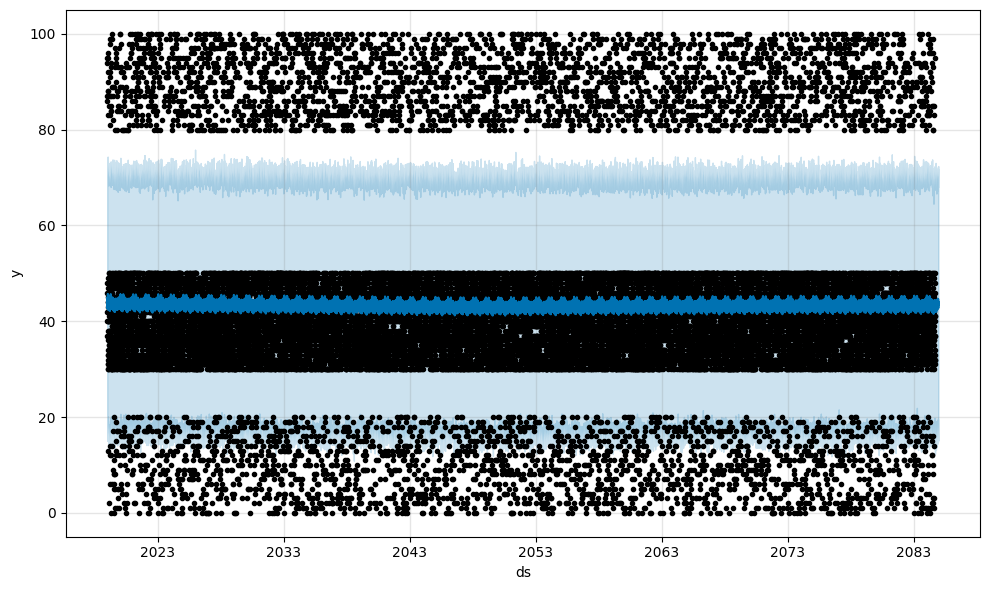

In [12]:
plot1 = model.plot(forecast)

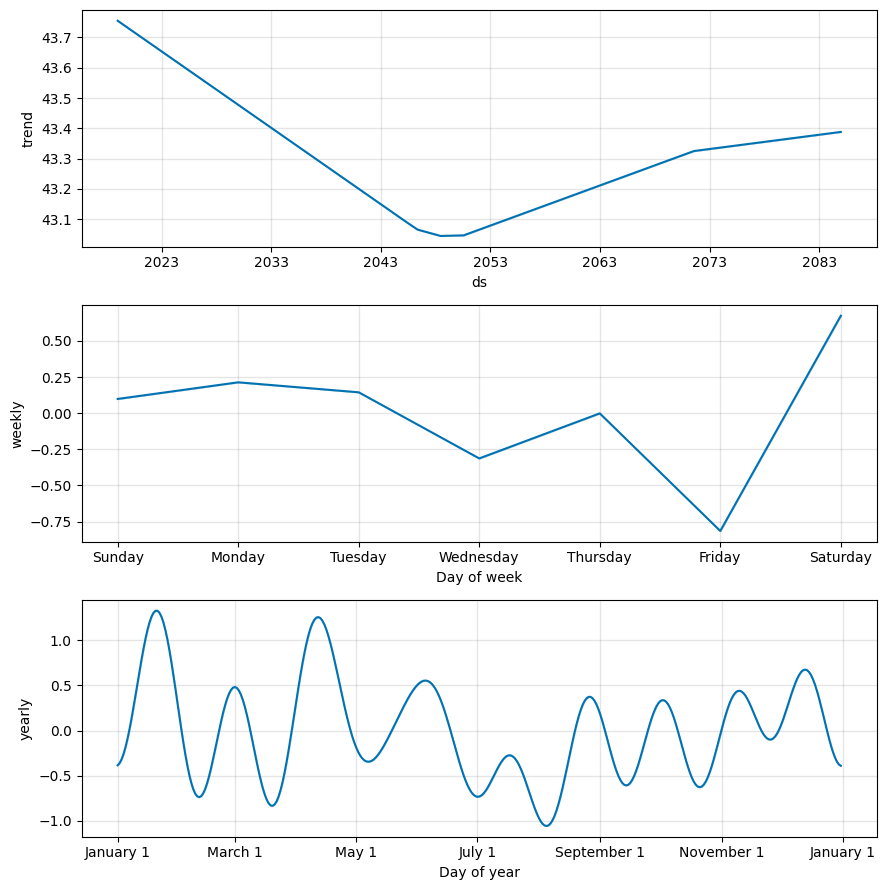

In [13]:
plt2 = model.plot_components(forecast)

In [ ]:
#order
sales_df2=sales_df
custom_order_time = ["morning", "mid_morning", "lunchtime", "afternoon", "late_evening", "night"]
custom_order_season = ["Summer", "Spring", "Fall", "Winter"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

#graphs for 'Units Sold' on top subplots
ax1.bar(custom_order_time, sales_df2.groupby('Time Period')['Units Sold'].sum().loc[custom_order_time], color='skyblue', label='Bar Chart')
ax1.plot(custom_order_time, sales_df2.groupby('Time Period')['Units Sold'].sum().loc[custom_order_time], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax1.set_title('Milk Sales by Time Period')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Units Sold')
ax1.set_xticklabels(custom_order_time, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.bar(custom_order_season, sales_df2.groupby('Season')['Units Sold'].sum().loc[custom_order_season], color='skyblue', label='Bar Chart')
ax2.plot(custom_order_season, sales_df2.groupby('Season')['Units Sold'].sum().loc[custom_order_season], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax2.set_title('Milk Sales by Season')
ax2.set_xlabel('Season')
ax2.set_ylabel('Units Sold')
ax2.set_xticklabels(custom_order_season, rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

#graphs for 'Price per Liter' on bottom subplots
ax3.bar(custom_order_time, sales_df2.groupby('Time Period')['Price per Liter'].sum().loc[custom_order_time], color='skyblue', label='Bar Chart')
ax3.plot(custom_order_time, sales_df2.groupby('Time Period')['Price per Liter'].sum().loc[custom_order_time], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax3.set_title('Milk Rates by Time Period')
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Price per Liter')
ax3.set_xticklabels(custom_order_time, rotation=45, ha='right')
ax3.grid(axis='y', linestyle='--', alpha=0.7)

ax4.bar(custom_order_season, sales_df2.groupby('Season')['Price per Liter'].sum().loc[custom_order_season], color='skyblue', label='Bar Chart')
ax4.plot(custom_order_season, sales_df2.groupby('Season')['Price per Liter'].sum().loc[custom_order_season], marker='o', color='orange', linewidth=2, label='Frequency Polygon')
ax4.set_title('Milk Rates by Season')
ax4.set_xlabel('Season')
ax4.set_ylabel('Price per Liter')
ax4.set_xticklabels(custom_order_season, rotation=45, ha='right')
ax4.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df = pd.read_csv('df.csv',parse_dates=True,index_col='date')

In [ ]:
df

In [ ]:
df.groupby(df.index.strftime("%Yxoxo%m")).sum()['balance']

In [ ]:
df = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m')).sum()['amount'])
df.columns=['Value']

In [ ]:
df

In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

In [ ]:

def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

In [ ]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Value'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Value'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

In [ ]:
df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
adf_check(df_testing.Value.dropna())

In [ ]:
df_testing.plot()

In [ ]:
ACF = plot_acf(df_testing.dropna(),lags=50)
# PACF = plot_pacf(df_testing.dropna(),lags=50)

Inventory data